<a href="https://colab.research.google.com/github/archajoshy/Advanced-Computing-Lab/blob/main/Experiment%2011/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import tensorflow as tf
from tensorflow import keras
data=keras.datasets.mnist

In [26]:
(X_train,y_train),(X_test,y_test)=data.load_data()

In [27]:
X_train.shape

(60000, 28, 28)

In [28]:
y_train.shape

(60000,)

In [29]:
X_test.shape

(10000, 28, 28)

In [30]:
y_test.shape

(10000,)

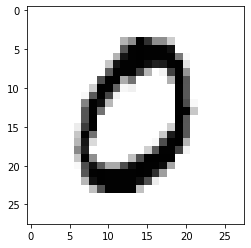

In [31]:
import matplotlib.pyplot as plt
plt.imshow(X_train[58500],cmap='binary')

In [32]:
y_train[58500]

0

In [33]:
X_train=X_train.reshape((60000,28,28,1))

In [34]:
X_test=X_test.reshape((10000,28,28,1))

In [35]:
X_train=X_train.astype('float32')/255

In [36]:
X_test=X_test.astype('float32')/255

In [37]:
model=keras.models.Sequential()

In [38]:
model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=X_train.shape[1:]))
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128,activation="relu"))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Dense(10,activation="softmax"))

In [39]:
#callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=3,restore_best_weights=True)

In [40]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 12, 12, 64)        0         
                                                                 
 flatten_1 (Flatten)         (None, 9216)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               1179776   
                                                      

In [41]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [42]:
model.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test))

Epoch 1/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1355 - accuracy: 0.9585 - val_loss: 0.0438 - val_accuracy: 0.9846
Epoch 2/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0527 - accuracy: 0.9837 - val_loss: 0.0350 - val_accuracy: 0.9894
Epoch 3/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0377 - accuracy: 0.9882 - val_loss: 0.0343 - val_accuracy: 0.9892
Epoch 4/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0277 - accuracy: 0.9913 - val_loss: 0.0347 - val_accuracy: 0.9897
Epoch 5/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0231 - accuracy: 0.9930 - val_loss: 0.0353 - val_accuracy: 0.9907
Epoch 6/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0190 - accuracy: 0.9938 - val_loss: 0.0368 - val_accuracy: 0.9905
Epoch 7/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0173 - accuracy: 0.9947 - val_loss: 0.0304 - val_accuracy:

In [43]:
test_loss,test_accuracy=model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0769 - accuracy: 0.9900


In [44]:
print(test_loss,test_accuracy)

0.07691778242588043 0.9900000095367432


In [45]:
!pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


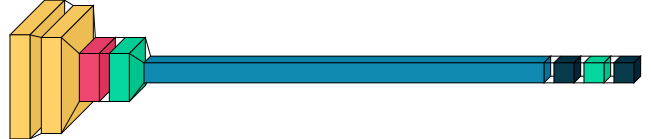

In [46]:
import visualkeras
visualkeras.layered_view(model)